# Name: Ayushi Singh

# Sap Id: 60009220202

# Lab3


1 Download and Prepare the Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X = scaler.fit_transform(X)


encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2. Define the Neural Network Structure

In [ ]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)


3. Implement Feedforward and Backpropagation

In [ ]:
def feedforward(X):
    global hidden_layer_activation, output_layer_activation
    hidden_layer_activation = sigmoid(np.dot(X, weights_input_hidden))
    output_layer_activation = sigmoid(np.dot(hidden_layer_activation, weights_hidden_output))
    return output_layer_activation

def calculate_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

def backpropagation(X, y_true, learning_rate):
    global weights_input_hidden, weights_hidden_output

    y_pred = feedforward(X)


    error = y_true - y_pred

    d_output = error * sigmoid_derivative(output_layer_activation)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)


    weights_hidden_output += hidden_layer_activation.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    return calculate_error(y_true, y_pred)


4. Train the Neural Network

In [ ]:
epochs = 1000
learning_rate = 0.01
errors = []
accuracies = []

for epoch in range(epochs):
    error = backpropagation(X_train, y_train, learning_rate)
    errors.append(error)

    predictions = feedforward(X_train)
    accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_train, axis=1))
    accuracies.append(accuracy)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Error: {error:.4f}, Accuracy: {accuracy:.4f}')


Epoch 0, Error: 0.3906, Accuracy: 0.3250
Epoch 100, Error: 0.1184, Accuracy: 0.6750
Epoch 200, Error: 0.1044, Accuracy: 0.8167
Epoch 300, Error: 0.0933, Accuracy: 0.8333
Epoch 400, Error: 0.0843, Accuracy: 0.8500
Epoch 500, Error: 0.0780, Accuracy: 0.8750
Epoch 600, Error: 0.0731, Accuracy: 0.8917
Epoch 700, Error: 0.0693, Accuracy: 0.8917
Epoch 800, Error: 0.0659, Accuracy: 0.9083
Epoch 900, Error: 0.0629, Accuracy: 0.9083


5. Plot the Results

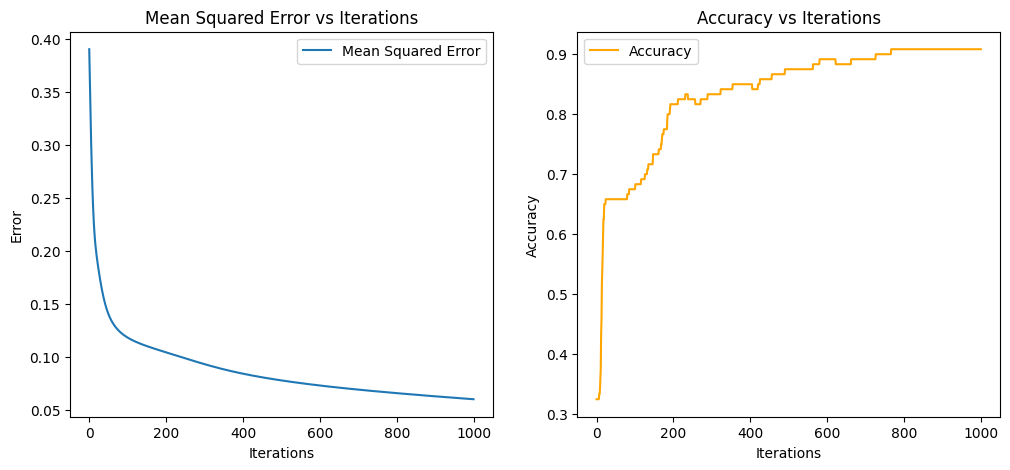

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(errors, label='Mean Squared Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Mean Squared Error vs Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()

plt.show()


6. Evaluate Performance on Test Data

In [ ]:

test_predictions = feedforward(X_test)
test_accuracy = np.mean(np.argmax(test_predictions, axis=1) == np.argmax(y_test, axis=1))
print(f'Test Accuracy: {test_accuracy * 100:.0f}%')


Test Accuracy: 97%
